In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
pd.set_option('display.max_colwidth',1000)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('violent_crime.csv')

In [3]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')

In [4]:
df

,case_number,date,block,primary_type,unique_id,zip_code,ward,community_area,street_outreach_organization,area,district,beat,age,sex,race,fbi_cd,fbi_descr,iucr_cd,iucr_secondary,month,day_of_week,hour,latitude,longitude,location
0,HZ100096,01/01/2016 02:04:00 AM,4600 S ST LAWRENCE,FATAL SHOOTING,HOM-HZ100096-1,60653,4,GRAND BOULEVARD,None,1,2,221,20 - 29,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,6,2,41.810127,-87.611604,POINT (-87.611604058699 41.810126904142)
1,HZ100342,01/01/2016 06:39:00 AM,1900 W GARFIELD BLVD,FATAL SHOOTING,HOM-HZ100342-1,60609,16,NEW CITY,PBMR New City,1,9,932,30 - 39,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,6,6,41.794218,-87.673175,POINT (-87.67317465388 41.794218345858)
2,HZ101042,01/01/2016 10:06:00 PM,6100 S SANGAMON ST,FATAL SHOOTING,HOM-HZ101042-1,60621,16,ENGLEWOOD,TADC Englewood | READI 60621,1,7,712,30 - 39,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,6,22,41.782338,-87.647905,POINT (-87.64790465388 41.782338345858)
3,HZ101842,01/02/2016 04:40:00 PM,6300 S STONY ISLAND,FATAL SHOOTING,HOM-HZ101842-1,60637,20,WOODLAWN,Project H.O.O.D. Woodlawn,1,3,314,0 - 19,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,7,16,41.780618,-87.586165,POINT (-87.58616465388 41.780618345858)
4,HZ103309,01/04/2016 08:22:00 AM,400 N CENTRAL AVE,FATAL SHOOTING,HOM-HZ103309-1,60644,37,AUSTIN,READI 60644 | INVC Austin,4,15,1523,20 - 29,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,2,8,41.888383,-87.765249,POINT (-87.765249058699 41.888383095858)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20031,JE266314,06/14/2021 10:32:00 PM,7300 S MOZART ST,NON-FATAL SHOOTING,SHOOT-JE266314-1,60629,18,CHICAGO LAWN,None,1,8,835,20 - 29,M,BLK,04B,AGGRAVATED BATTERY (INDEX),041A,AGGRAVATED - HANDGUN,6,2,22,41.760197,-87.694021,POINT (-87.694020941301 41.760196904142)
20032,JE289151,07/03/2021 11:49:00 PM,1000 W 89TH ST,NON-FATAL SHOOTING,SHOOT-JE289151-1,60620,21,AUBURN GRESHAM,Acclivus Washington Heights,2,22,2222,40 - 49,M,BLK,04B,AGGRAVATED BATTERY (INDEX),041A,AGGRAVATED - HANDGUN,7,7,23,41.733063,-87.649051,POINT (-87.649050941301 41.733063095858)
20033,JE290206,07/04/2021 10:44:00 PM,3000 E 79TH PL,NON-FATAL SHOOTING,SHOOT-JE290206-1,60617,7,SOUTH CHICAGO,Claretian Associates South Chicago,2,4,422,40 - 49,M,BLK,04B,AGGRAVATED BATTERY (INDEX),041A,AGGRAVATED - HANDGUN,7,1,22,41.750657,-87.550559,POINT (-87.550559058699 41.750656904142)
20034,JE292814,07/06/2021 10:36:00 PM,12100 S DOTY AVE,FATAL SHOOTING,HOM-JE292814-1,60628,9,RIVERDALE,None,2,5,532,0 - 19,M,BLK,00,NON-CRIMINAL,5078,INVESTIGATION,7,3,22,41.673107,-87.600781,POINT (-87.600780941301 41.673106904142)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20036 entries, 0 to 20035
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   case_number                   20036 non-null  object 
 1   date                          20036 non-null  object 
 2   block                         20036 non-null  object 
 3   primary_type                  20036 non-null  object 
 4   unique_id                     20036 non-null  object 
 5   zip_code                      20036 non-null  int64  
 6   ward                          20036 non-null  int64  
 7   community_area                20036 non-null  object 
 8   street_outreach_organization  20036 non-null  object 
 9   area                          20036 non-null  int64  
 10  district                      20036 non-null  int64  
 11  beat                          20036 non-null  int64  
 12  age                           19801 non-null  object 
 13  s

In [6]:
df['age'].fillna('UNKNOWN', inplace=True)
df['sex'].fillna('UNKNOWN', inplace=True)
df['race'].fillna('(NOT PROVIDED)', inplace=True)

In [7]:
df['iucr_secondary'].replace(' -', ':', inplace=True, regex=True)

In [8]:
df['iucr_secondary'].value_counts()

AGGRAVATED: HANDGUN                           15415
FIRST DEGREE MURDER                            3599
ARMED: HANDGUN                                  376
ATTEMPT: ARMED-HANDGUN                          192
AGGRAVATED: OTHER FIREARM                       123
AGGRAVATED DOMESTIC BATTERY: HANDGUN             92
ATTEMPT ARMED: HANDGUN                           86
SECOND DEGREE MURDER                             38
AGGRAVATED VEHICULAR HIJACKING                   31
AGGRAVATED POLICE OFFICER: HANDGUN               21
AGGRAVATED PO: HANDGUN                           18
AGGRAVATED                                        8
INVESTIGATION                                     5
VEHICULAR HIJACKING                               4
ATTEMPT AGGRAVATED                                4
ATTEMPT: AGGRAVATED                               3
ARMED: OTHER FIREARM                              3
AGGRAVATED POLICE OFFICER: OTHER FIREARM          3
ATTEMPT ARMED: OTHER FIREARM                      3
AGGRAVATED P

In [9]:
def help_available(string):
    if string == 'None':
        return 0
    else:
        return 1

In [10]:
df['so_yes_no'] = df['street_outreach_organization'].map(help_available)

In [11]:
df['street_outreach_organization'].value_counts().head(40)

None                                                                     5100
READI 60644 | INVC Austin                                                1132
UCAN North Lawndale | READI 60623                                         875
TADC Englewood | READI 60621                                              864
ALSO Humboldt Park                                                        825
READI 60624 | INVC West Garfield Park                                     808
TADC West Englewood | READI 60631                                         683
INVC Austin                                                               589
Claretian Associates South Shore                                          515
SWOP Chicago Lawn                                                         467
PBMR New City                                                             461
Acclivus Greater Grand Crossing                                           433
READI 60623 | New Life Centers South Lawndale | Enlace South Law

In [12]:
df['so_yes_no'].value_counts()

1    14936
0     5100
Name: so_yes_no, dtype: int64

In [13]:
df['age'].value_counts()

20 - 29    8954
30 - 39    4333
0 - 19     4008
40 - 49    1492
50 - 59     690
60 - 69     252
UNKNOWN     235
70 - 79      49
80+          23
Name: age, dtype: int64

In [14]:
df['sex'].unique()

array(['M', 'F', 'UNKNOWN', 'X', '(NOT PROVIDED)'], dtype=object)

In [15]:
df.columns

Index(['case_number', 'date', 'block', 'primary_type', 'unique_id', 'zip_code',
       'ward', 'community_area', 'street_outreach_organization', 'area',
       'district', 'beat', 'age', 'sex', 'race', 'fbi_cd', 'fbi_descr',
       'iucr_cd', 'iucr_secondary', 'month', 'day_of_week', 'hour', 'latitude',
       'longitude', 'location', 'so_yes_no'],
      dtype='object')

In [16]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.to_period('D')

In [17]:
df

,case_number,date,block,primary_type,unique_id,zip_code,ward,community_area,street_outreach_organization,area,district,beat,age,sex,race,fbi_cd,fbi_descr,iucr_cd,iucr_secondary,month,day_of_week,hour,latitude,longitude,location,so_yes_no
0,HZ100096,2016-01-01,4600 S ST LAWRENCE,FATAL SHOOTING,HOM-HZ100096-1,60653,4,GRAND BOULEVARD,None,1,2,221,20 - 29,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,6,2,41.810127,-87.611604,POINT (-87.611604058699 41.810126904142),0
1,HZ100342,2016-01-01,1900 W GARFIELD BLVD,FATAL SHOOTING,HOM-HZ100342-1,60609,16,NEW CITY,PBMR New City,1,9,932,30 - 39,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,6,6,41.794218,-87.673175,POINT (-87.67317465388 41.794218345858),1
2,HZ101042,2016-01-01,6100 S SANGAMON ST,FATAL SHOOTING,HOM-HZ101042-1,60621,16,ENGLEWOOD,TADC Englewood | READI 60621,1,7,712,30 - 39,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,6,22,41.782338,-87.647905,POINT (-87.64790465388 41.782338345858),1
3,HZ101842,2016-01-02,6300 S STONY ISLAND,FATAL SHOOTING,HOM-HZ101842-1,60637,20,WOODLAWN,Project H.O.O.D. Woodlawn,1,3,314,0 - 19,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,7,16,41.780618,-87.586165,POINT (-87.58616465388 41.780618345858),1
4,HZ103309,2016-01-04,400 N CENTRAL AVE,FATAL SHOOTING,HOM-HZ103309-1,60644,37,AUSTIN,READI 60644 | INVC Austin,4,15,1523,20 - 29,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,2,8,41.888383,-87.765249,POINT (-87.765249058699 41.888383095858),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20031,JE266314,2021-06-14,7300 S MOZART ST,NON-FATAL SHOOTING,SHOOT-JE266314-1,60629,18,CHICAGO LAWN,None,1,8,835,20 - 29,M,BLK,04B,AGGRAVATED BATTERY (INDEX),041A,AGGRAVATED: HANDGUN,6,2,22,41.760197,-87.694021,POINT (-87.694020941301 41.760196904142),0
20032,JE289151,2021-07-03,1000 W 89TH ST,NON-FATAL SHOOTING,SHOOT-JE289151-1,60620,21,AUBURN GRESHAM,Acclivus Washington Heights,2,22,2222,40 - 49,M,BLK,04B,AGGRAVATED BATTERY (INDEX),041A,AGGRAVATED: HANDGUN,7,7,23,41.733063,-87.649051,POINT (-87.649050941301 41.733063095858),1
20033,JE290206,2021-07-04,3000 E 79TH PL,NON-FATAL SHOOTING,SHOOT-JE290206-1,60617,7,SOUTH CHICAGO,Claretian Associates South Chicago,2,4,422,40 - 49,M,BLK,04B,AGGRAVATED BATTERY (INDEX),041A,AGGRAVATED: HANDGUN,7,1,22,41.750657,-87.550559,POINT (-87.550559058699 41.750656904142),1
20034,JE292814,2021-07-06,12100 S DOTY AVE,FATAL SHOOTING,HOM-JE292814-1,60628,9,RIVERDALE,None,2,5,532,0 - 19,M,BLK,00,NON-CRIMINAL,5078,INVESTIGATION,7,3,22,41.673107,-87.600781,POINT (-87.600780941301 41.673106904142),0


In [18]:
ohe = OneHotEncoder(handle_unknown='error', drop='first', sparse=False)

cat_race = df[['race']]
ohe.fit(cat_race)

# ohe.transform(cat_age).shape
race_encoded = pd.DataFrame(ohe.transform(cat_race).astype(int), columns=ohe.categories_[0][1:])
race_encoded

,API,BLK,I,U,WBH,WHI,WWH
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
20031,0,1,0,0,0,0,0
20032,0,1,0,0,0,0,0
20033,0,1,0,0,0,0,0
20034,0,1,0,0,0,0,0


In [19]:
ohe = OneHotEncoder(handle_unknown='error', drop='first', sparse=False)

cat_age = df[['age']]
ohe.fit(cat_age)

# ohe.transform(cat_age).shape
age_encoded = pd.DataFrame(ohe.transform(cat_age).astype(int), columns=ohe.categories_[0][1:])
age_encoded

,20 - 29,30 - 39,40 - 49,50 - 59,60 - 69,70 - 79,80+,UNKNOWN
0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
20031,1,0,0,0,0,0,0,0
20032,0,0,1,0,0,0,0,0
20033,0,0,1,0,0,0,0,0
20034,0,0,0,0,0,0,0,0


In [20]:
ohe = OneHotEncoder(handle_unknown='error', drop='first', sparse=False)

cat_sex = df[['sex']]
ohe.fit(cat_sex)

# ohe.transform(cat_age).shape
sex_encoded = pd.DataFrame(ohe.transform(cat_sex).astype(int), columns=ohe.categories_[0][1:])
sex_encoded

,F,M,UNKNOWN,X
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
20031,0,1,0,0
20032,0,1,0,0
20033,0,1,0,0
20034,0,1,0,0


In [21]:
df = pd.concat([df, age_encoded, race_encoded, sex_encoded], axis=1)
df.tail()

,case_number,date,block,primary_type,unique_id,zip_code,ward,community_area,street_outreach_organization,area,district,beat,age,sex,race,fbi_cd,fbi_descr,iucr_cd,iucr_secondary,month,day_of_week,hour,latitude,longitude,location,so_yes_no,20 - 29,30 - 39,40 - 49,50 - 59,60 - 69,70 - 79,80+,UNKNOWN,API,BLK,I,U,WBH,WHI,WWH,F,M,UNKNOWN,X
20031,JE266314,2021-06-14,7300 S MOZART ST,NON-FATAL SHOOTING,SHOOT-JE266314-1,60629,18,CHICAGO LAWN,None,1,8,835,20 - 29,M,BLK,04B,AGGRAVATED BATTERY (INDEX),041A,AGGRAVATED: HANDGUN,6,2,22,41.760197,-87.694021,POINT (-87.694020941301 41.760196904142),0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
20032,JE289151,2021-07-03,1000 W 89TH ST,NON-FATAL SHOOTING,SHOOT-JE289151-1,60620,21,AUBURN GRESHAM,Acclivus Washington Heights,2,22,2222,40 - 49,M,BLK,04B,AGGRAVATED BATTERY (INDEX),041A,AGGRAVATED: HANDGUN,7,7,23,41.733063,-87.649051,POINT (-87.649050941301 41.733063095858),1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
20033,JE290206,2021-07-04,3000 E 79TH PL,NON-FATAL SHOOTING,SHOOT-JE290206-1,60617,7,SOUTH CHICAGO,Claretian Associates South Chicago,2,4,422,40 - 49,M,BLK,04B,AGGRAVATED BATTERY (INDEX),041A,AGGRAVATED: HANDGUN,7,1,22,41.750657,-87.550559,POINT (-87.550559058699 41.750656904142),1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
20034,JE292814,2021-07-06,12100 S DOTY AVE,FATAL SHOOTING,HOM-JE292814-1,60628,9,RIVERDALE,None,2,5,532,0 - 19,M,BLK,00,NON-CRIMINAL,5078,INVESTIGATION,7,3,22,41.673107,-87.600781,POINT (-87.600780941301 41.673106904142),0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
20035,JE277577,2021-06-24,2000 W 52ND ST,FATAL SHOOTING,HOM-JE277577-1,60609,16,NEW CITY,None,1,9,932,40 - 49,M,WWH,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,6,5,3,41.798852,-87.676535,POINT (-87.67653534612 41.798851654142),0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [34]:
grouplist = [ 'date', 'area']

In [35]:
df_cases = df.groupby(grouplist, as_index=False).sum()

In [24]:
df_cases.rename(columns={'unique_id' : 'victim_count'})

,date,case_number,ward,community_area,so_yes_no,street_outreach_organization,area,district,block,beat,month,day_of_week,age,race,sex,victim_count
0,2016-01-01,HZ100035,8,SOUTH CHICAGO,0,None,2,4,8000 S PAXTON AVE,414,1,6,30 - 39,BLK,F,1
1,2016-01-01,HZ100040,8,BURNSIDE,0,None,2,4,9200 S DREXEL AVE,413,1,6,30 - 39,BLK,M,1
2,2016-01-01,HZ100096,4,GRAND BOULEVARD,0,None,1,2,4600 S ST LAWRENCE,221,1,6,20 - 29,BLK,M,1
3,2016-01-01,HZ100096,4,GRAND BOULEVARD,0,None,1,2,4600 S ST LAWRENCE,221,1,6,30 - 39,BLK,M,1
4,2016-01-01,HZ100171,21,WASHINGTON HEIGHTS,0,None,2,22,9800 S BEVERLY AVE,2213,1,6,20 - 29,BLK,M,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18423,2021-07-13,JE300498,26,HUMBOLDT PARK,1,ALSO Humboldt Park,5,25,1500 N TRIPP AVE,2534,7,3,0 - 19,WWH,M,1
18424,2021-07-13,JE300498,26,HUMBOLDT PARK,1,ALSO Humboldt Park,5,25,1500 N TRIPP AVE,2534,7,3,30 - 39,WWH,M,1
18425,2021-07-13,JE300609,18,ASHBURN,0,None,1,8,7900 S KILPATRICK AVE,834,7,3,0 - 19,WWH,M,1
18426,2021-07-13,JE300610,6,CHATHAM,1,Acclivus Greater Grand Crossing,2,6,00 W 79TH ST,623,7,3,30 - 39,BLK,M,1


In [25]:
df_cases = df_cases[df_cases['date'] < '2020-01-01']
df_cases

,date,case_number,ward,community_area,so_yes_no,street_outreach_organization,area,district,block,beat,month,day_of_week,age,race,sex,unique_id
0,2016-01-01,HZ100035,8,SOUTH CHICAGO,0,None,2,4,8000 S PAXTON AVE,414,1,6,30 - 39,BLK,F,1
1,2016-01-01,HZ100040,8,BURNSIDE,0,None,2,4,9200 S DREXEL AVE,413,1,6,30 - 39,BLK,M,1
2,2016-01-01,HZ100096,4,GRAND BOULEVARD,0,None,1,2,4600 S ST LAWRENCE,221,1,6,20 - 29,BLK,M,1
3,2016-01-01,HZ100096,4,GRAND BOULEVARD,0,None,1,2,4600 S ST LAWRENCE,221,1,6,30 - 39,BLK,M,1
4,2016-01-01,HZ100171,21,WASHINGTON HEIGHTS,0,None,2,22,9800 S BEVERLY AVE,2213,1,6,20 - 29,BLK,M,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12559,2019-12-31,JC566552,9,CHATHAM,0,None,2,6,700 E 92ND PL,633,12,3,30 - 39,BLK,M,1
12560,2019-12-31,JC566690,21,WASHINGTON HEIGHTS,0,None,2,22,9400 S ASHLAND AVE,2221,12,3,0 - 19,BLK,M,1
12561,2019-12-31,JC566803,31,HERMOSA,0,None,5,25,2400 N KILBOURN AVE,2521,12,3,0 - 19,WBH,F,1
12562,2019-12-31,JC566803,31,HERMOSA,0,None,5,25,2400 N KILBOURN AVE,2521,12,3,20 - 29,WWH,F,1


In [26]:
df.groupby('area').count()

,case_number,date,block,primary_type,unique_id,zip_code,ward,community_area,street_outreach_organization,district,beat,age,sex,race,fbi_cd,fbi_descr,iucr_cd,iucr_secondary,month,day_of_week,hour,latitude,longitude,location,so_yes_no,20 - 29,30 - 39,40 - 49,50 - 59,60 - 69,70 - 79,80+,UNKNOWN,API,BLK,I,U,WBH,WHI,WWH,F,M,UNKNOWN,X
area,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,6047,6047,6047,6047,6047,6047,6047,6047,6047,6047,6047,6047,6047,6047,6047,6047,6047,6047,6047,6047,6047,6047,6047,6047,6047,6047,6047,6047,6047,6047,6047,6047,6047,6047,6047,6047,6047,6047,6047,6047,6047,6047,6047,6047
2,4739,4739,4739,4739,4739,4739,4739,4739,4739,4739,4739,4739,4739,4739,4739,4739,4739,4739,4739,4739,4739,4739,4739,4739,4739,4739,4739,4739,4739,4739,4739,4739,4739,4739,4739,4739,4739,4739,4739,4739,4739,4739,4739,4739
3,1631,1631,1631,1631,1631,1631,1631,1631,1631,1631,1631,1631,1631,1631,1631,1631,1631,1631,1631,1631,1631,1631,1631,1631,1631,1631,1631,1631,1631,1631,1631,1631,1631,1631,1631,1631,1631,1631,1631,1631,1631,1631,1631,1631
4,5891,5891,5891,5891,5891,5891,5891,5891,5891,5891,5891,5891,5891,5891,5891,5891,5891,5891,5891,5891,5891,5891,5891,5891,5891,5891,5891,5891,5891,5891,5891,5891,5891,5891,5891,5891,5891,5891,5891,5891,5891,5891,5891,5891
5,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728


In [27]:
df_dow = df.groupby('day_of_week').count()
df_dow

,case_number,date,block,primary_type,unique_id,zip_code,ward,community_area,street_outreach_organization,area,district,beat,age,sex,race,fbi_cd,fbi_descr,iucr_cd,iucr_secondary,month,hour,latitude,longitude,location,so_yes_no,20 - 29,30 - 39,40 - 49,50 - 59,60 - 69,70 - 79,80+,UNKNOWN,API,BLK,I,U,WBH,WHI,WWH,F,M,UNKNOWN,X
day_of_week,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923
2,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656
3,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439
4,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376
5,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255
6,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645
7,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742


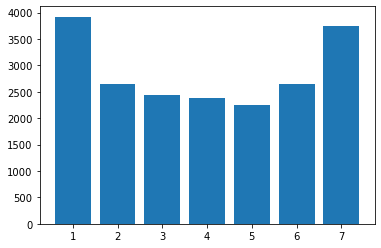

In [28]:
plt.bar(df_dow.index, df_dow['unique_id']);
# 1 Sun, 2 Mon etc

In [29]:
df.groupby('primary_type').count()

,case_number,date,block,unique_id,zip_code,ward,community_area,street_outreach_organization,area,district,beat,age,sex,race,fbi_cd,fbi_descr,iucr_cd,iucr_secondary,month,day_of_week,hour,latitude,longitude,location,so_yes_no,20 - 29,30 - 39,40 - 49,50 - 59,60 - 69,70 - 79,80+,UNKNOWN,API,BLK,I,U,WBH,WHI,WWH,F,M,UNKNOWN,X
primary_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FATAL SHOOTING,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275
NON-FATAL SHOOTING,16367,16367,16367,16367,16367,16367,16367,16367,16367,16367,16367,16367,16367,16367,16367,16367,16367,16367,16367,16367,16367,16367,16367,16367,16367,16367,16367,16367,16367,16367,16367,16367,16367,16367,16367,16367,16367,16367,16367,16367,16367,16367,16367,16367
NON-SHOOTING HOMICIDE,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394,394


In [30]:
df['month_year'] = pd.to_datetime(df['date']).dt.to_period('M')
df.head()

TypeError: Passing PeriodDtype data is invalid. Use `data.to_timestamp()` instead

In [ ]:
df['month_year']

In [ ]:
df_my = df.groupby('month_year').size()
df_my

In [ ]:
df.groupby('case_number').size().count()

In [ ]:
df_my['unique_id'].plot()